<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-statement---1" data-toc-modified-id="Problem-statement---1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem statement - 1</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#ANN---Artificial-Neural-Network" data-toc-modified-id="ANN---Artificial-Neural-Network-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>ANN - Artificial Neural Network</a></span></li><li><span><a href="#Hyperparameter-tuning-for-Batch-size-and-epochs" data-toc-modified-id="Hyperparameter-tuning-for-Batch-size-and-epochs-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Hyperparameter tuning for Batch size and epochs</a></span></li><li><span><a href="#Hyperparameter-tuning-for-learning-rate-and-dropout-rate" data-toc-modified-id="Hyperparameter-tuning-for-learning-rate-and-dropout-rate-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Hyperparameter tuning for learning rate and dropout rate</a></span></li><li><span><a href="#Hyperparameter-tuning-for-activation-function-and-kernel-initializer" data-toc-modified-id="Hyperparameter-tuning-for-activation-function-and-kernel-initializer-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Hyperparameter tuning for activation function and kernel initializer</a></span></li><li><span><a href="#Optimized-model-with-best-parameters" data-toc-modified-id="Optimized-model-with-best-parameters-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Optimized model with best parameters</a></span></li></ul></li><li><span><a href="#Problem-statement---2" data-toc-modified-id="Problem-statement---2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem statement - 2</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Visualization</a></span></li><li><span><a href="#ANN---Artificial-Neural-Network" data-toc-modified-id="ANN---Artificial-Neural-Network-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>ANN - Artificial Neural Network</a></span></li><li><span><a href="#Hyperparameter-tuning-for-Batch-size-and-epochs" data-toc-modified-id="Hyperparameter-tuning-for-Batch-size-and-epochs-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Hyperparameter tuning for Batch size and epochs</a></span></li><li><span><a href="#Hyperparameter-tuning-for-learning-rate-and-dropout-rate" data-toc-modified-id="Hyperparameter-tuning-for-learning-rate-and-dropout-rate-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Hyperparameter tuning for learning rate and dropout rate</a></span></li><li><span><a href="#Hyperparameter-tuning-for-activation-function-and-kernerl-initializer" data-toc-modified-id="Hyperparameter-tuning-for-activation-function-and-kernerl-initializer-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Hyperparameter tuning for activation function and kernerl initializer</a></span></li><li><span><a href="#Optimized-model-with-best-parameters" data-toc-modified-id="Optimized-model-with-best-parameters-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Optimized model with best parameters</a></span></li></ul></li></ul></div>

### Problem statement - 1

In [1]:
# Libraries for EDA of dataset
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data processing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, KFold

#Libraries for Neural Networks
import tensorflow as tf
import keras   
from keras.models import Sequential  
from keras.layers import Dense 
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam
from keras.layers import Dropout

# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Warnings
import warnings
warnings.filterwarnings(action='ignore')

#### Exploratory Data Analysis

In [2]:
# Loading dataset
forest = pd.read_csv(r".\forestfires.csv")

# Overview of data
forest.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0          small  
2         0          small  
3         0          small  
4         0          small  

[5 rows x 31 columns]

In [3]:
#1. Shape of data
forest.shape

(517, 31)

In [4]:
#2. Columns details
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
#3. Technical information
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
#4. Unique values
forest.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

In [7]:
#5. Null values
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
#7. Duplicate values
forest.duplicated().sum()

8

In [9]:
forest = forest.drop_duplicates()
forest.shape

(509, 31)

#### Visualization

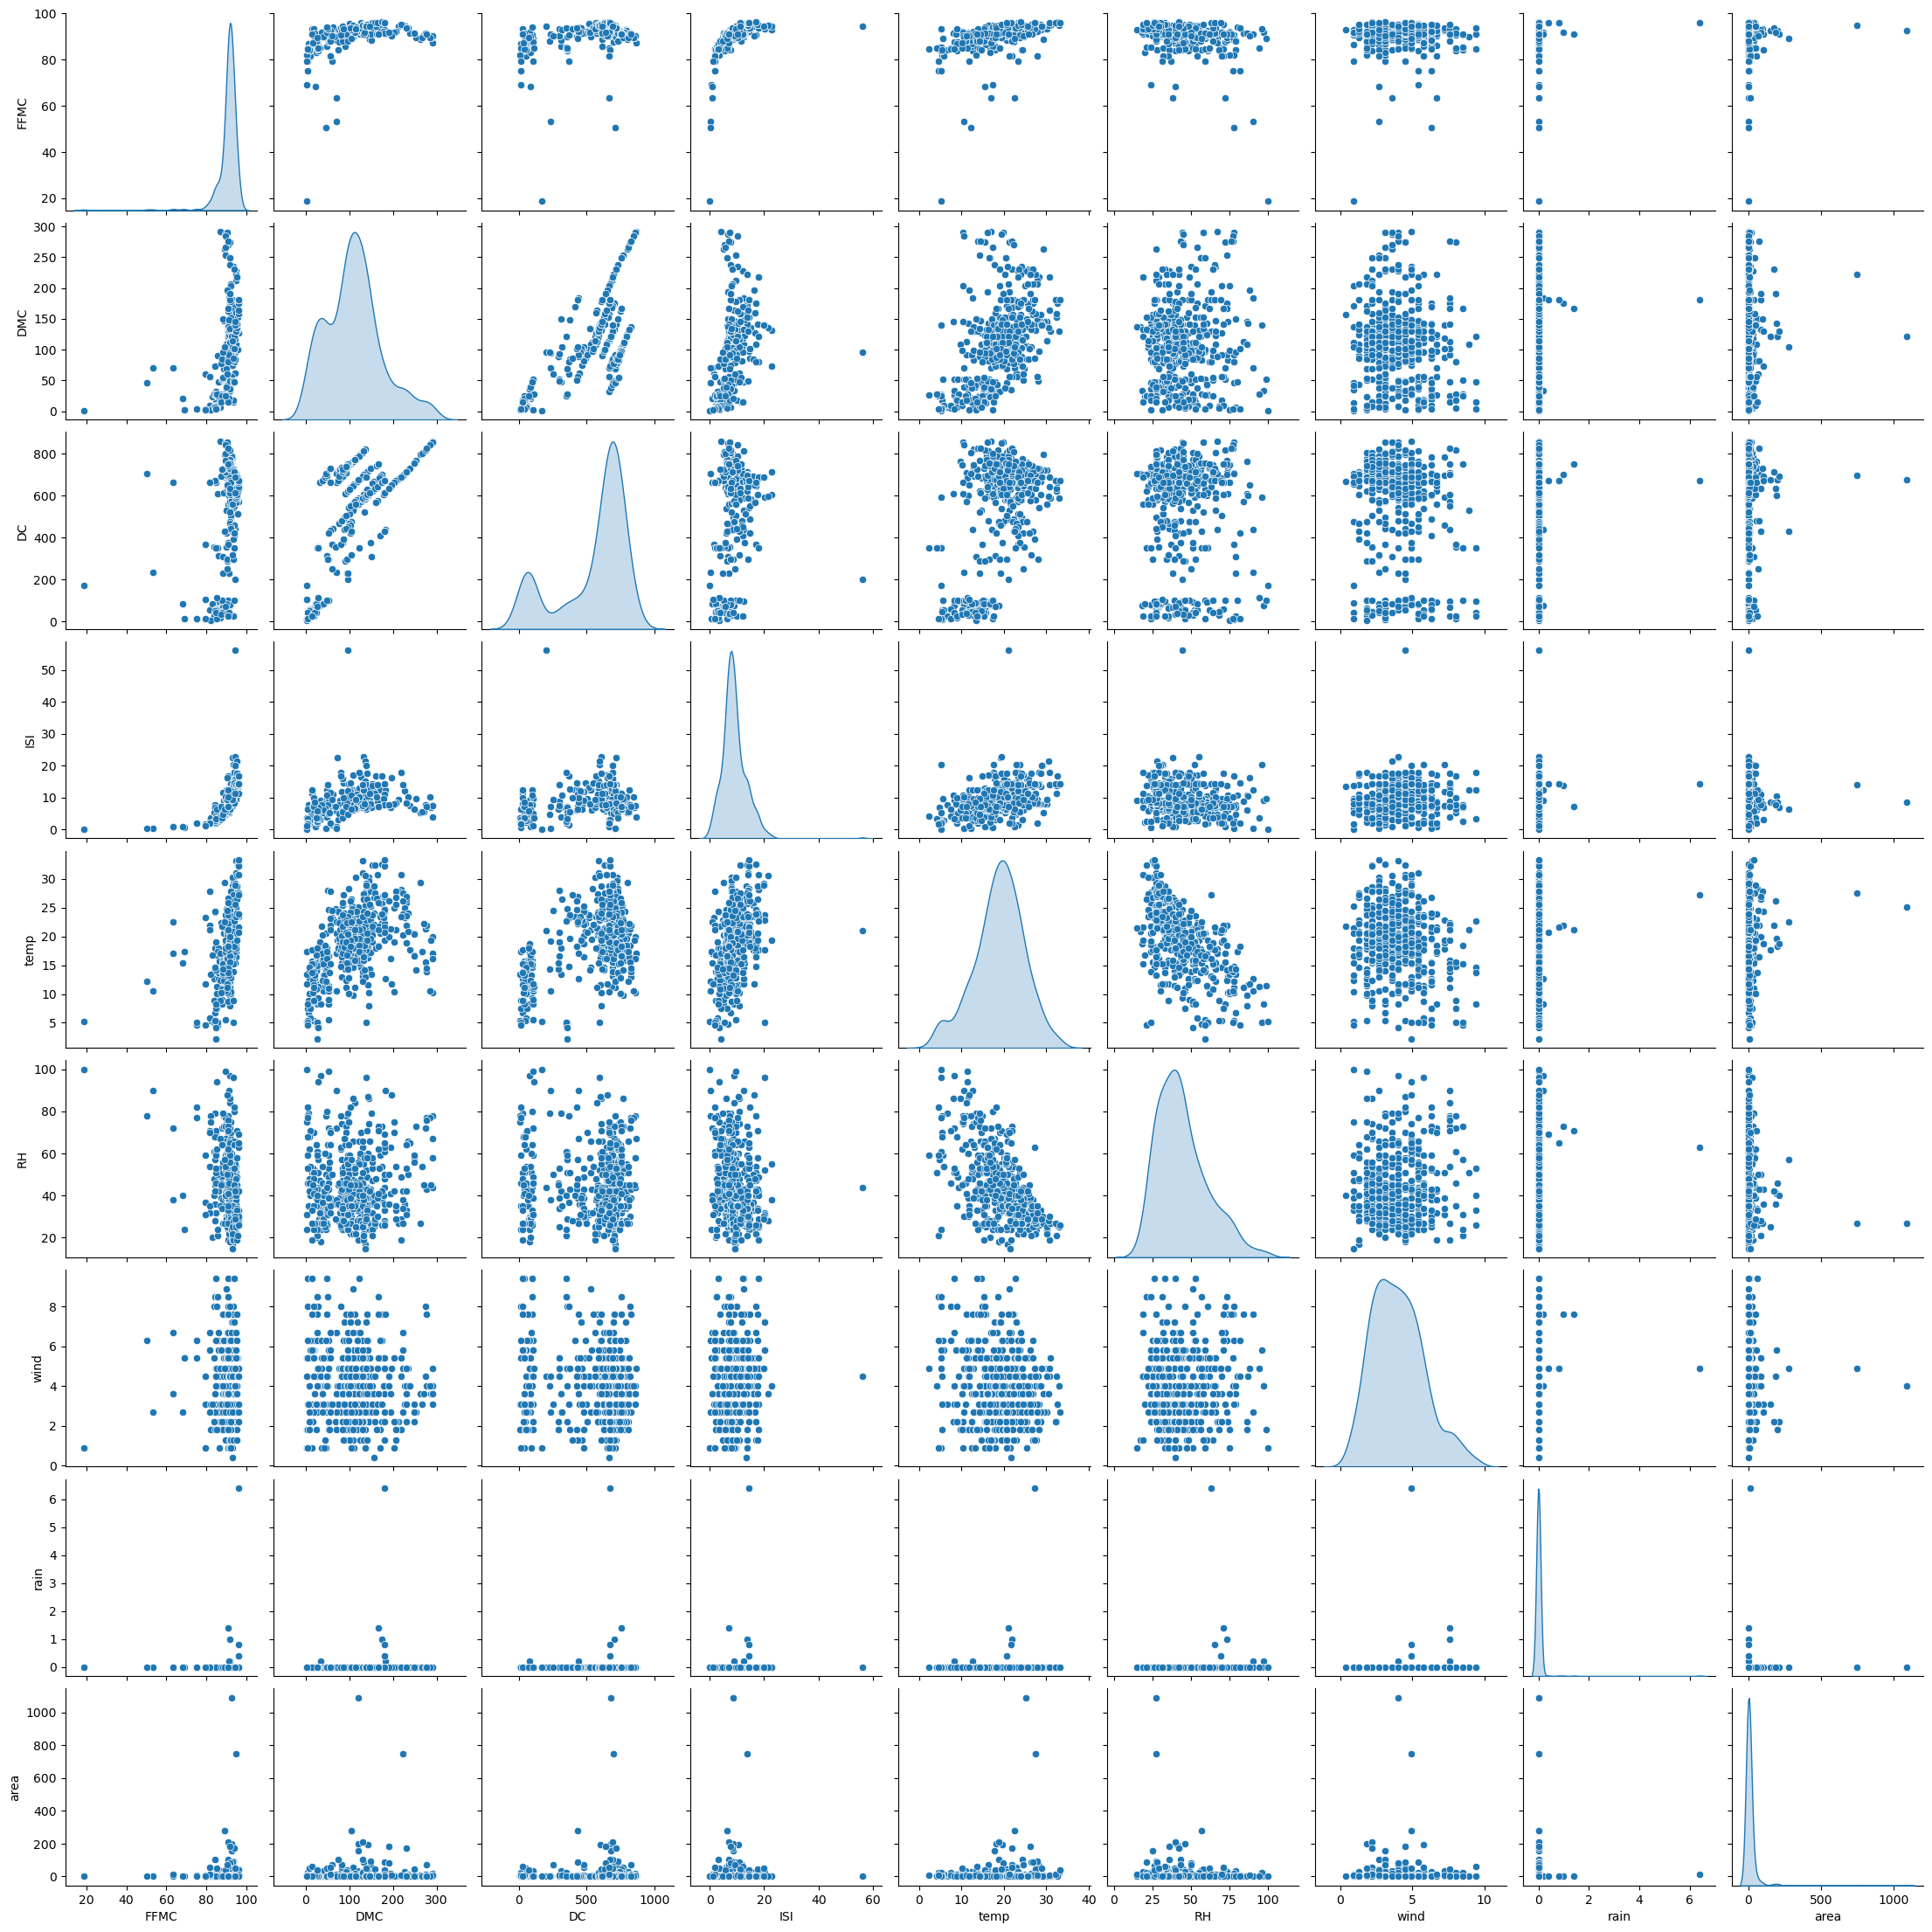

In [10]:
#8. Visualizatoin of dataset
sns.pairplot(data=forest.iloc[:, 2:11], kind='scatter', diag_kind='kde')
plt.show()

In [11]:
# Skewness 
forest.iloc[:, 2:11].skew()

FFMC    -6.540474
DMC      0.558596
DC      -1.100245
ISI      2.529891
temp    -0.321869
RH       0.869644
wind     0.581689
rain    20.044822
area    12.753940
dtype: float64

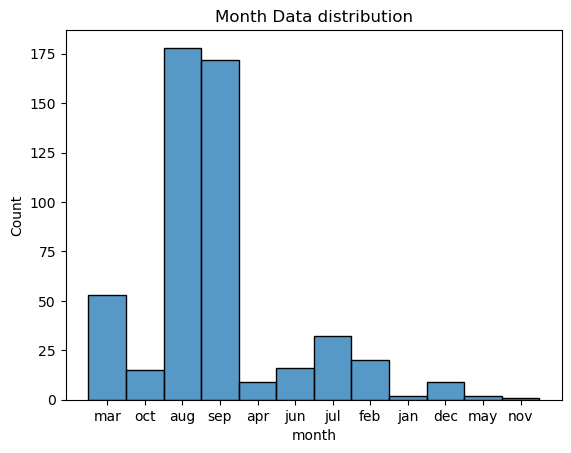

In [12]:
# Non numerical data
sns.histplot(data=forest, x='month')
plt.title('Month Data distribution')
plt.show()

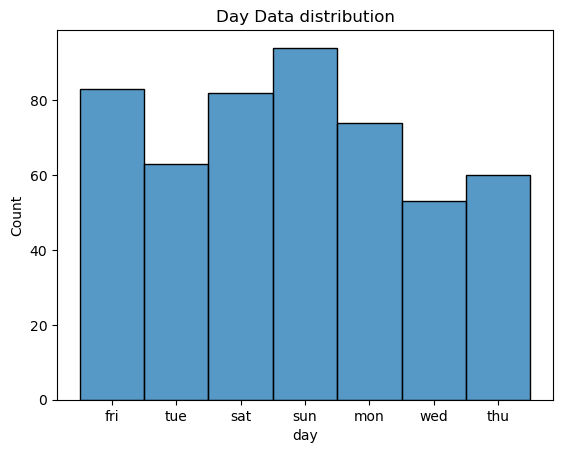

In [13]:
sns.histplot(data=forest, x='day')
plt.title('Day Data distribution')
plt.show()

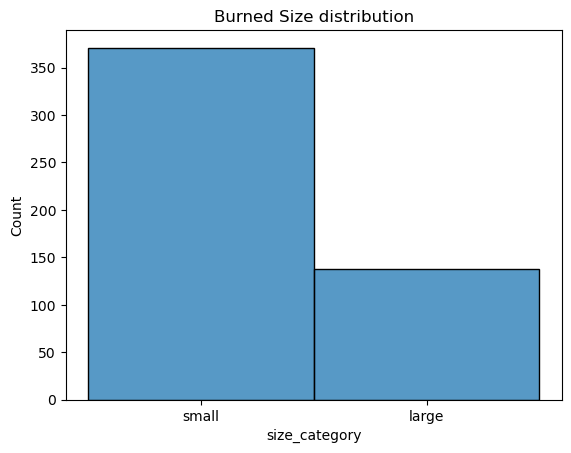

In [14]:
sns.histplot(data=forest, x='size_category')
plt.title('Burned Size distribution')
plt.show()

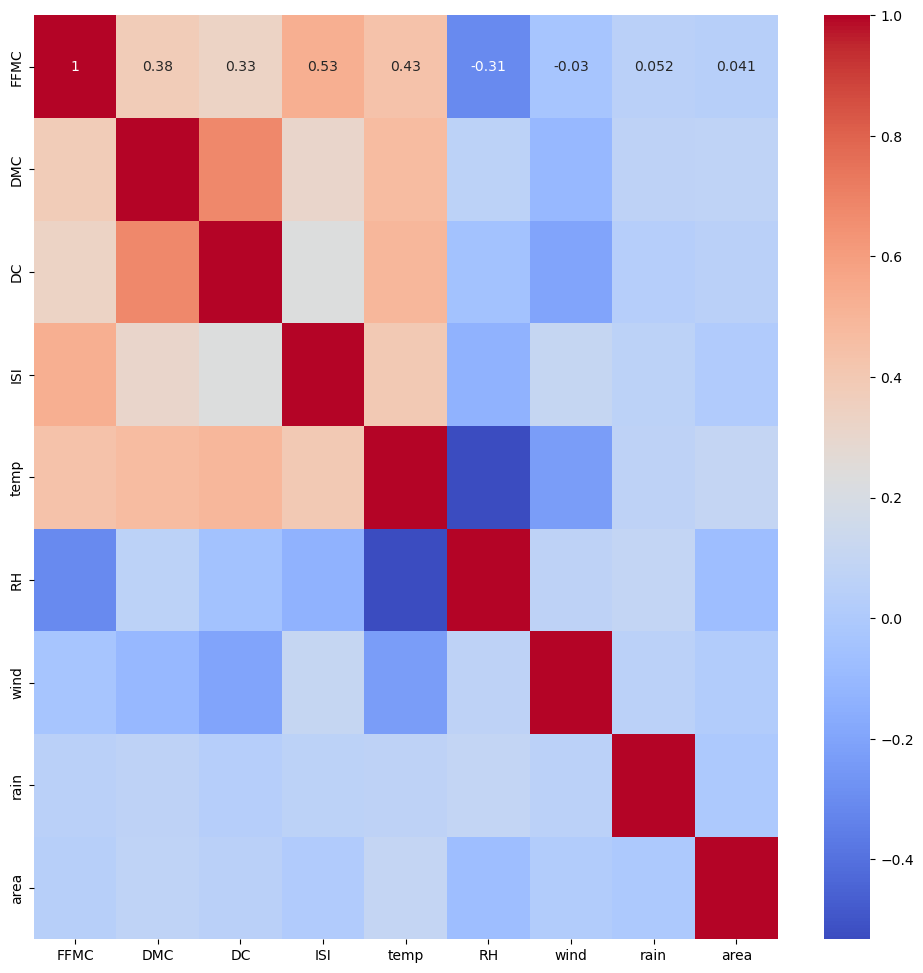

In [15]:
# Correlation
plt.figure(figsize=(12, 12))
sns.heatmap(data=forest.iloc[:, 2:11].corr(), annot=True, cmap='coolwarm')
plt.show()

In [16]:
forest.iloc[:, 2:11].corr()

FFMC       DMC        DC       ISI      temp        RH      wind  \
FFMC  1.000000  0.382925  0.331956  0.531926  0.431744 -0.306262 -0.030409   
DMC   0.382925  1.000000  0.681446  0.309459  0.470875  0.062772 -0.104563   
DC    0.331956  0.681446  1.000000  0.229757  0.496608 -0.047971 -0.202856   
ISI   0.531926  0.309459  0.229757  1.000000  0.395858 -0.135955  0.104834   
temp  0.431744  0.470875  0.496608  0.395858  1.000000 -0.532503 -0.227754   
RH   -0.306262  0.062772 -0.047971 -0.135955 -0.532503  1.000000  0.070721   
wind -0.030409 -0.104563 -0.202856  0.104834 -0.227754  0.070721  1.000000   
rain  0.052280  0.071017  0.033772  0.062132  0.067911  0.094343  0.059332   
area  0.040998  0.076932  0.051542  0.008429  0.099173 -0.074554  0.012623   

          rain      area  
FFMC  0.052280  0.040998  
DMC   0.071017  0.076932  
DC    0.033772  0.051542  
ISI   0.062132  0.008429  
temp  0.067911  0.099173  
RH    0.094343 -0.074554  
wind  0.059332  0.012623  
rain  1.000000 -0.006511  
area -0.006511  1.000000

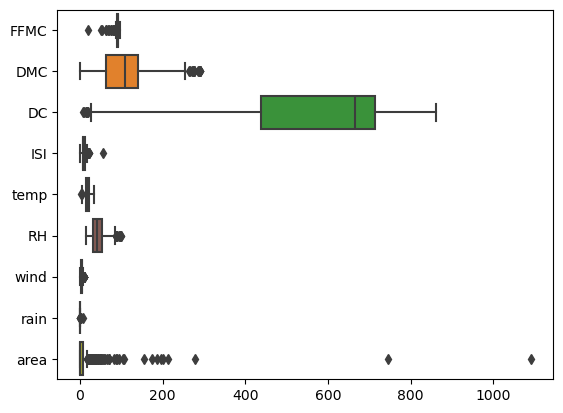

In [17]:
#9. Outliers
sns.boxplot(data=forest.iloc[:, 2:11], orient='h')
plt.show()

Observation:

1. Dataset has 517 records and 31 columns. In which, categorical data columns month and day are onehot encoded.
2. Data types are consistent.
3. No null values observed.
4. 8 nos of duplicate records found and removed.
5. From boxplot, outliers can be observed.

In [18]:
# Selection of target and feature values
features = forest.drop(['month', 'day', 'size_category'], axis=1)
features.head()

FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  dayfri  ...  monthdec  \
0  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0       1  ...         0   
1  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0       0  ...         0   
2  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0       0  ...         0   
3  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0       1  ...         0   
4  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0       0  ...         0   

   monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0         0         0         0         0         1         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         1         0         0   
4         0         0         0         0         1         0         0   

   monthoct  monthsep  
0         0         0  
1         1         0  
2         1         0  
3         0         0  
4         0         0  

[5 rows x 28 columns]

In [19]:
target = forest['size_category']
target.head()

0    small
1    small
2    small
3    small
4    small
Name: size_category, dtype: object

In [20]:
target.value_counts()

size_category
small    371
large    138
Name: count, dtype: int64

In [21]:
# Label encoding of target

encoder = LabelEncoder()
target = encoder.fit_transform(target)
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [22]:
# splitting of dataset

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=0)

In [23]:
x_train.shape, x_test.shape

((356, 28), (153, 28))

In [24]:
y_train.shape, y_test.shape

((356,), (153,))

In [25]:
# Scaling data

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### ANN - Artificial Neural Network

In [27]:
# Initializing ANN
ann = tf.keras.models.Sequential()

#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=14, activation="relu"))

# Adding dropout
ann.add(Dropout(rate = 0.1))

#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=7,activation="relu"))

# Adding dropout
ann.add(Dropout(rate = 0.1))

#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#Compiling ANN
adam = Adam(learning_rate=0.01)
ann.compile(optimizer=adam,loss="binary_crossentropy",metrics=['accuracy'])
#Fitting ANN
ann.fit(x_train,y_train, epochs=35, batch_size=10, verbose=0)

In [28]:
# Predictions
predicts = ann.predict(x_test)
predicts = (predicts > 0.5)
predicts

5/5 [==============================] - 0s 4ms/step


array([[ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [

In [29]:
# Evaluation of model

cm = confusion_matrix(y_test, predicts)
cm

array([[ 34,   3],
       [  3, 113]], dtype=int64)

In [30]:
clr = classification_report(y_test, predicts)
print(clr)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        37
           1       0.97      0.97      0.97       116

    accuracy                           0.96       153
   macro avg       0.95      0.95      0.95       153
weighted avg       0.96      0.96      0.96       153



In [31]:
accuracy = accuracy_score(y_test, predicts)
accuracy

0.9607843137254902

In [32]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                406       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 519
Trainable params: 519
Non-trainable params: 0
_________________________________________________________________


#### Hyperparameter tuning for Batch size and epochs

In [33]:
batch_size = [15,25,35, 45]
epochs = [10, 20, 50, 100]

score = 0
ep = 0
batch = 0
for size in batch_size:
    for epoch in epochs:
        ann.fit(x_train,y_train, epochs=epoch, batch_size=size, verbose=0)
        preds = ann.predict(x_test)
        preds = (preds > 0.5)
        acc_score = accuracy_score(y_test, preds)
        if acc_score > score:
            score = acc_score
            ep = epoch
            batch = size

5/5 [==============================] - 0s 4ms/step


In [34]:
print(f'Best Batch size: {batch} and epochs: {ep} with accuracy score: {score}')

Best Batch size: 15 and epochs: 10 with accuracy score: 0.9738562091503268


#### Hyperparameter tuning for learning rate and dropout rate

In [35]:
learning_rate = [0.01, 0.001, 0.0001]
dropout_rate = [0.1, 0.2, 0.5]
learn_rate = 0
drop_rate = 0
score_rate = 0

for lr in learning_rate:
    for dr in dropout_rate:
        ann = tf.keras.models.Sequential()
        ann.add(tf.keras.layers.Dense(units=14, activation="relu"))
        ann.add(Dropout(rate = dr))
        ann.add(tf.keras.layers.Dense(units=7,activation="relu"))
        ann.add(Dropout(rate = dr))
        ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
        adam = Adam(learning_rate=lr)
        ann.compile(optimizer=adam,loss="binary_crossentropy",metrics=['accuracy'])
        #Fitting ANN
        ann.fit(x_train,y_train, epochs=ep, batch_size=batch, verbose=0)
        preds = ann.predict(x_test)
        preds = (preds > 0.5)
        acc_score = accuracy_score(y_test, preds)
        if acc_score > score_rate:
            score_rate = acc_score
            learn_rate = lr
            drop_rate = dr

5/5 [==============================] - 0s 4ms/step


In [36]:
print(f'Best learning rate: {learn_rate} and dropout rate: {drop_rate} with accuracy score: {score_rate}')

Best learning rate: 0.01 and dropout rate: 0.2 with accuracy score: 0.9411764705882353


#### Hyperparameter tuning for activation function and kernel initializer

In [37]:
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero', 'glorot_uniform']

active_fn = ''
kernel_init = ''
score_rate = 0

for fn in activation_function:
    for ker in init:
        ann = tf.keras.models.Sequential()
        ann.add(tf.keras.layers.Dense(units=14, activation=fn, kernel_initializer=ker))
        ann.add(Dropout(rate = drop_rate))
        ann.add(tf.keras.layers.Dense(units=7,activation=fn, kernel_initializer=ker))
        ann.add(Dropout(rate = drop_rate))
        ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
        adam = Adam(learning_rate=learn_rate)
        ann.compile(optimizer=adam,loss="binary_crossentropy",metrics=['accuracy'])
        #Fitting ANN
        ann.fit(x_train,y_train, epochs=ep, batch_size=batch, verbose=0)
        preds = ann.predict(x_test)
        preds = (preds > 0.5)
        acc_score = accuracy_score(y_test, preds)
        if acc_score > score_rate:
            score_rate = acc_score
            active_fn = fn
            kernel_init = ker

5/5 [==============================] - 0s 4ms/step


In [38]:
print(f'Best activation function: {active_fn} and kernel initializer: {kernel_init} with accuracy score: {score_rate}')

Best activation function: linear and kernel initializer: uniform with accuracy score: 0.9803921568627451


#### Optimized model with best parameters

In [39]:
# Best model using optimal parameters
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=14, activation=f'{active_fn}', kernel_initializer=f'{kernel_init}'))
ann.add(Dropout(rate = drop_rate))
ann.add(tf.keras.layers.Dense(units=7, activation=f'{active_fn}', kernel_initializer=f'{kernel_init}'))
ann.add(Dropout(rate = drop_rate))
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
adam = Adam(learning_rate=learn_rate)
ann.compile(optimizer=adam,loss="binary_crossentropy",metrics=['accuracy'])

#Fitting ANN
ann.fit(x_train,y_train, epochs=ep, batch_size=batch, verbose=0)
preds = ann.predict(x_test)
preds = (preds > 0.5)
acc_score = accuracy_score(y_test, preds)

5/5 [==============================] - 0s 4ms/step


In [40]:
if acc_score > accuracy:
    print('Accuracy of optimized model: ', acc_score)
    print('Best parameters of optimized model:')
    print(f'activation function: {active_fn} and kernel initializer: {kernel_init}')
    print(f'Best learning rate: {learn_rate} and dropout rate: {drop_rate}')
    print(f'Best Batch size: {batch} and epochs: {ep}')
else:
    print('Accuracy of manual model: ', accuracy)
    print('Parameters of manual model:')
    print('activation function: relu and kernel initializer: glorot_uniform')
    print('Best learning rate: 0.001 and dropout rate: 0.1')
    print('Best Batch size: 50 and epochs: 30')

Accuracy of manual model:  0.9607843137254902
Parameters of manual model:
activation function: relu and kernel initializer: glorot_uniform
Best learning rate: 0.001 and dropout rate: 0.1
Best Batch size: 50 and epochs: 30


### Problem statement - 2

#### Exploratory Data Analysis

In [41]:
# Loading dataset
turbine = pd.read_csv(r"D:\Education\Data science\Assignments\16 Neural Networks\gas_turbines.csv")

# View of dataset
turbine.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   

       CO     NOX  
0  3.1547  82.722  
1  3.2363  82.776  
2  3.2012  82.468  
3  3.1923  82.670  
4  3.2484  82.311

In [42]:
#1. Shape of dataset
turbine.shape

(15039, 11)

In [43]:
#2. Technical information
turbine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [44]:
#3. Presence of null values
turbine.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [45]:
#4. Presence of duplicate entries
turbine.duplicated().sum()

0

In [46]:
#5. Statistical information
turbine.describe().T

count         mean        std          min          25%        50%  \
AT    15039.0    17.764381   7.574323     0.522300    11.408000    18.1860   
AP    15039.0  1013.199240   6.410760   985.850000  1008.900000  1012.8000   
AH    15039.0    79.124174  13.793439    30.344000    69.750000    82.2660   
AFDP  15039.0     4.200294   0.760197     2.087400     3.723900     4.1862   
GTEP  15039.0    25.419061   4.173916    17.878000    23.294000    25.0820   
TIT   15039.0  1083.798770  16.527806  1000.800000  1079.600000  1088.7000   
TAT   15039.0   545.396183   7.866803   512.450000   542.170000   549.8900   
TEY   15039.0   134.188464  15.829717   100.170000   127.985000   133.7800   
CDP   15039.0    12.102353   1.103196     9.904400    11.622000    12.0250   
CO    15039.0     1.972499   2.222206     0.000388     0.858055     1.3902   
NOX   15039.0    68.190934  10.470586    27.765000    61.303500    66.6010   

            75%        max  
AT      23.8625    34.9290  
AP    1016.9000  1034.2000  
AH      90.0435   100.2000  
AFDP     4.5509     7.6106  
GTEP    27.1840    37.4020  
TIT   1096.0000  1100.8000  
TAT    550.0600   550.6100  
TEY    140.8950   174.6100  
CDP     12.5780    15.0810  
CO       2.1604    44.1030  
NOX     73.9355   119.8900

#### Visualization

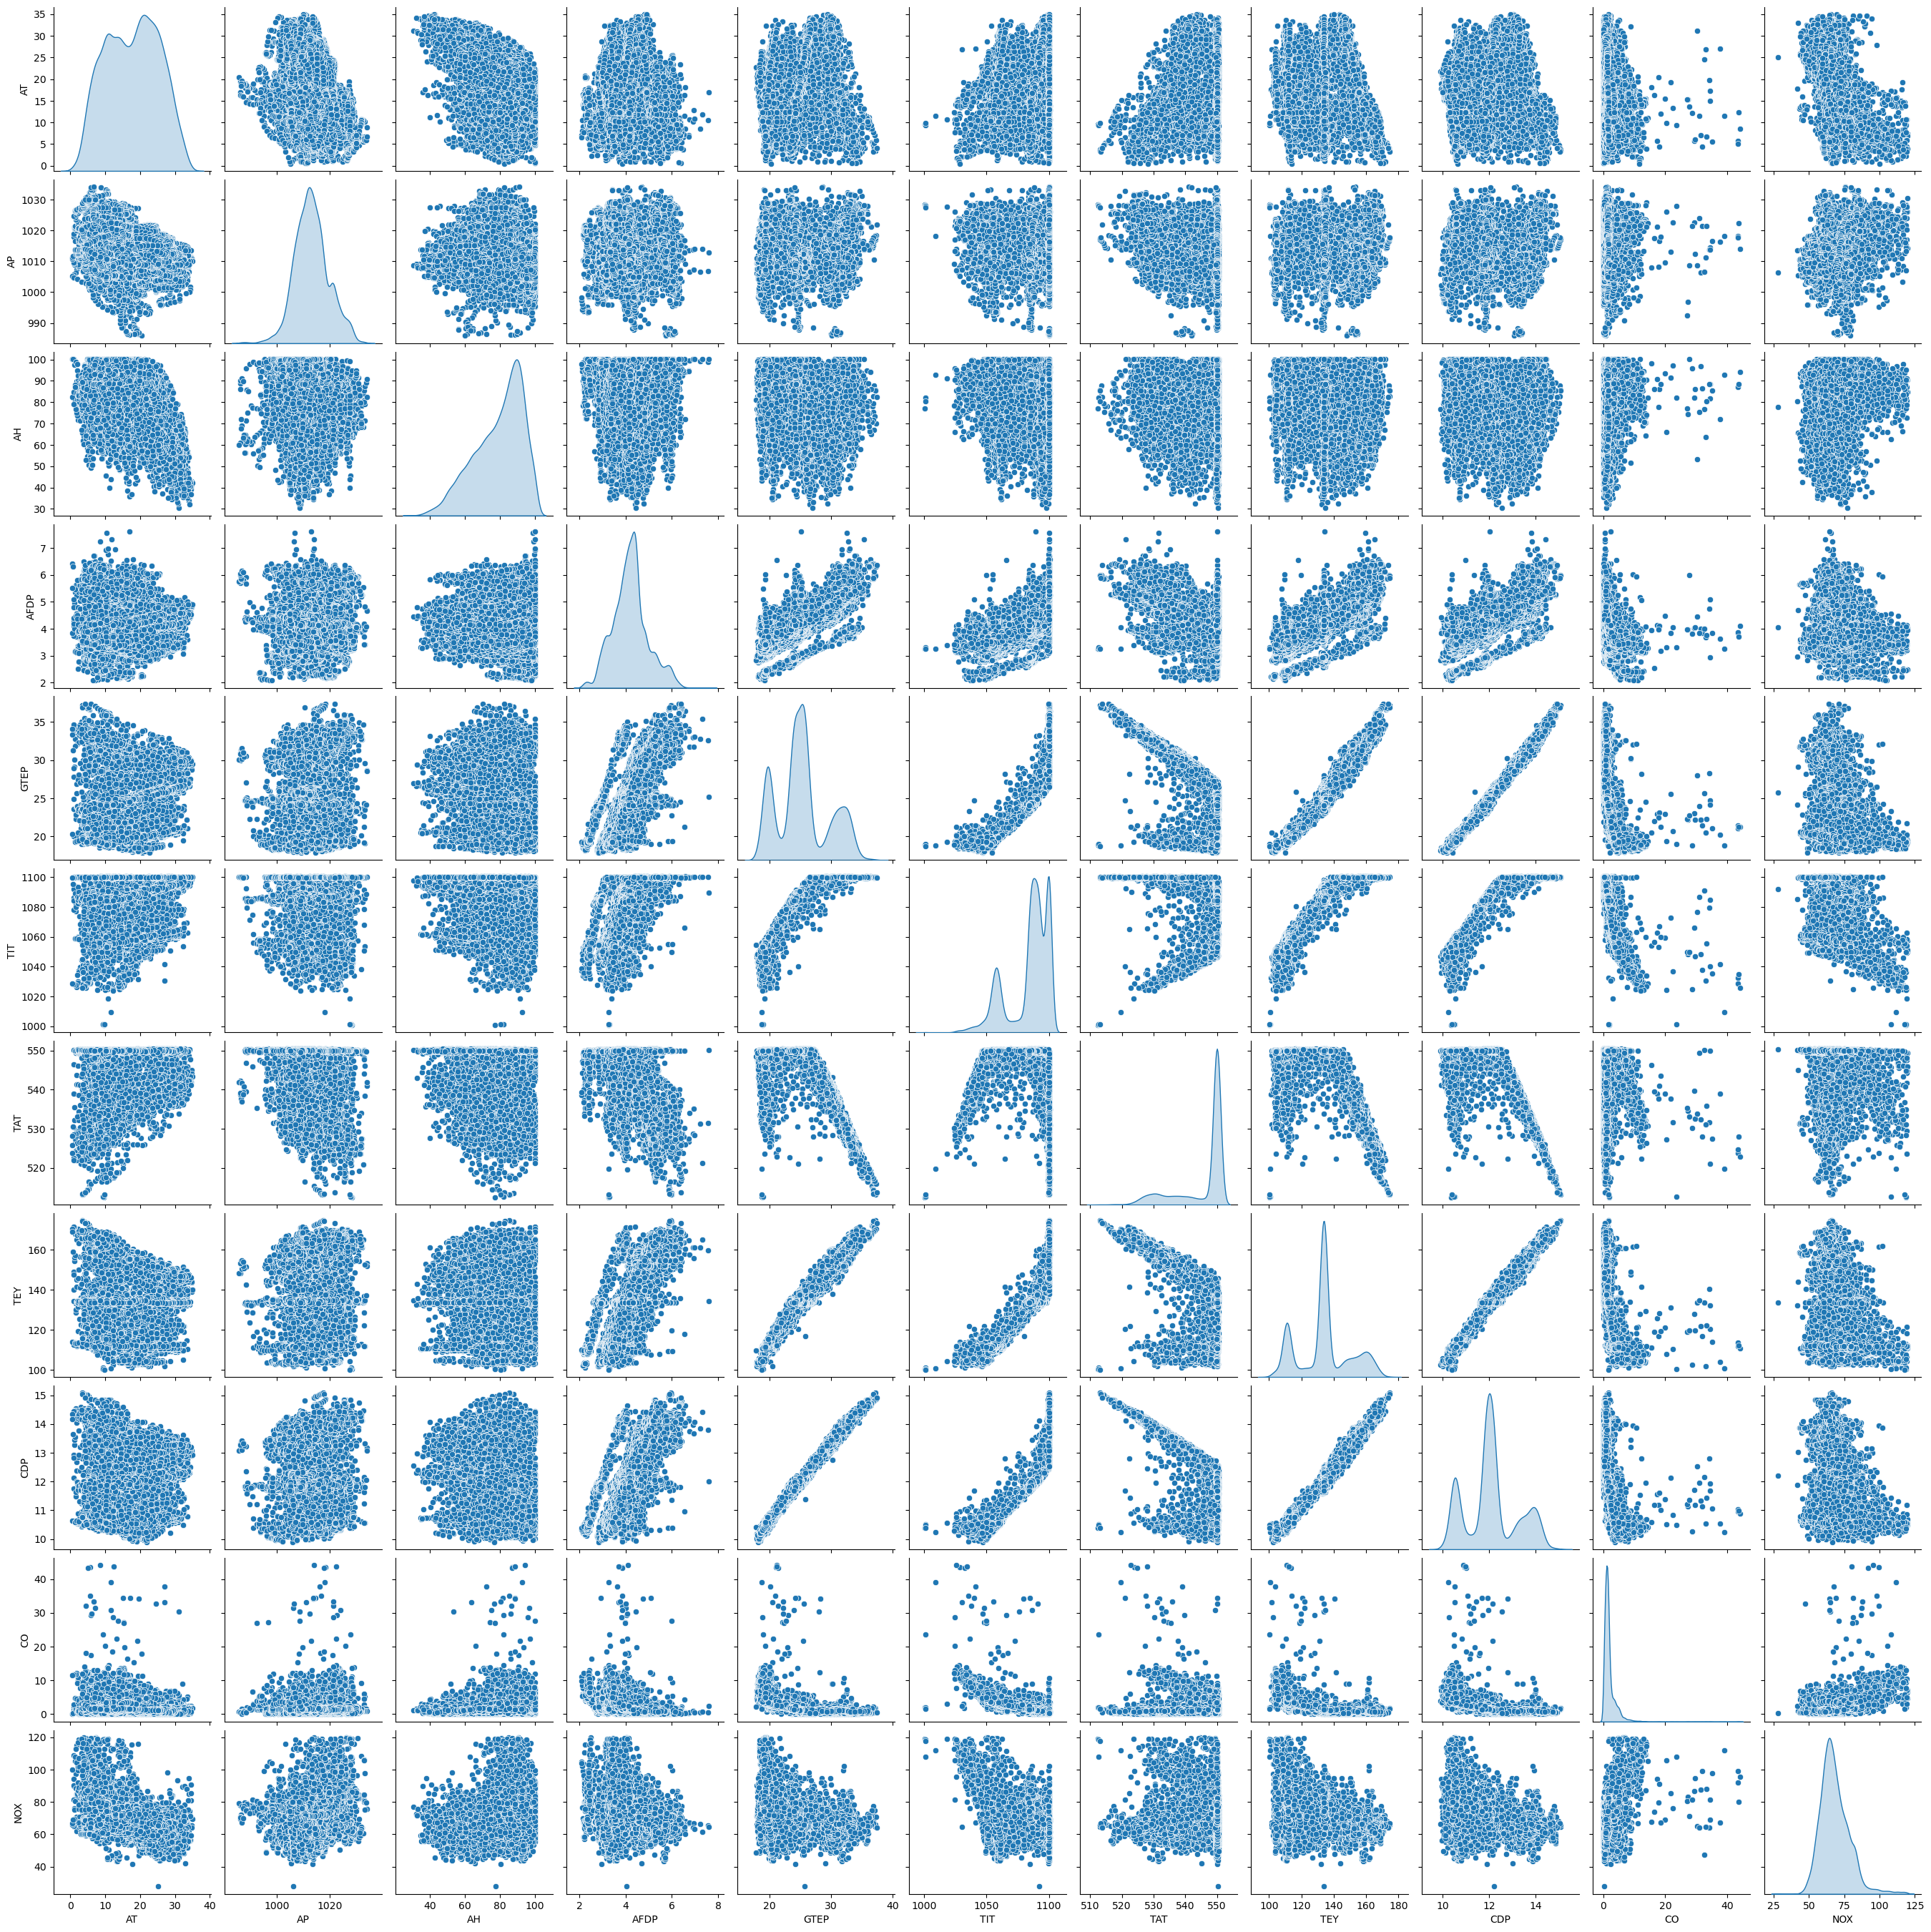

In [47]:
#6. Visualization of dataset distribution
sns.pairplot(data=turbine, kind='scatter', diag_kind='kde')
plt.show()

In [48]:
# Skewness in the dataset
turbine.skew()

AT     -0.030710
AP      0.107601
AH     -0.681224
AFDP    0.315150
GTEP    0.370987
TIT    -1.133744
TAT    -1.485524
TEY     0.145963
CDP     0.263042
CO      6.534577
NOX     1.126605
dtype: float64

In [49]:
# Correlation among dataset
turbine.corr()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
TEY  -0.207495  0.146939 -0.110272  0.717995  0.977042  0.891587 -0.720356   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   

           TEY       CDP        CO       NOX  
AT   -0.207495 -0.100705 -0.088588 -0.600006  
AP    0.146939  0.131198  0.041614  0.256744  
AH   -0.110272 -0.182010  0.165505  0.143061  
AFDP  0.717995  0.727152 -0.334207 -0.037299  
GTEP  0.977042  0.993784 -0.508259 -0.208496  
TIT   0.891587  0.887238 -0.688272 -0.231636  
TAT  -0.720356 -0.744740  0.063404  0.009888  
TEY   1.000000  0.988473 -0.541751 -0.102631  
CDP   0.988473  1.000000 -0.520783 -0.169103  
CO   -0.541751 -0.520783  1.000000  0.316743  
NOX  -0.102631 -0.169103  0.316743  1.000000

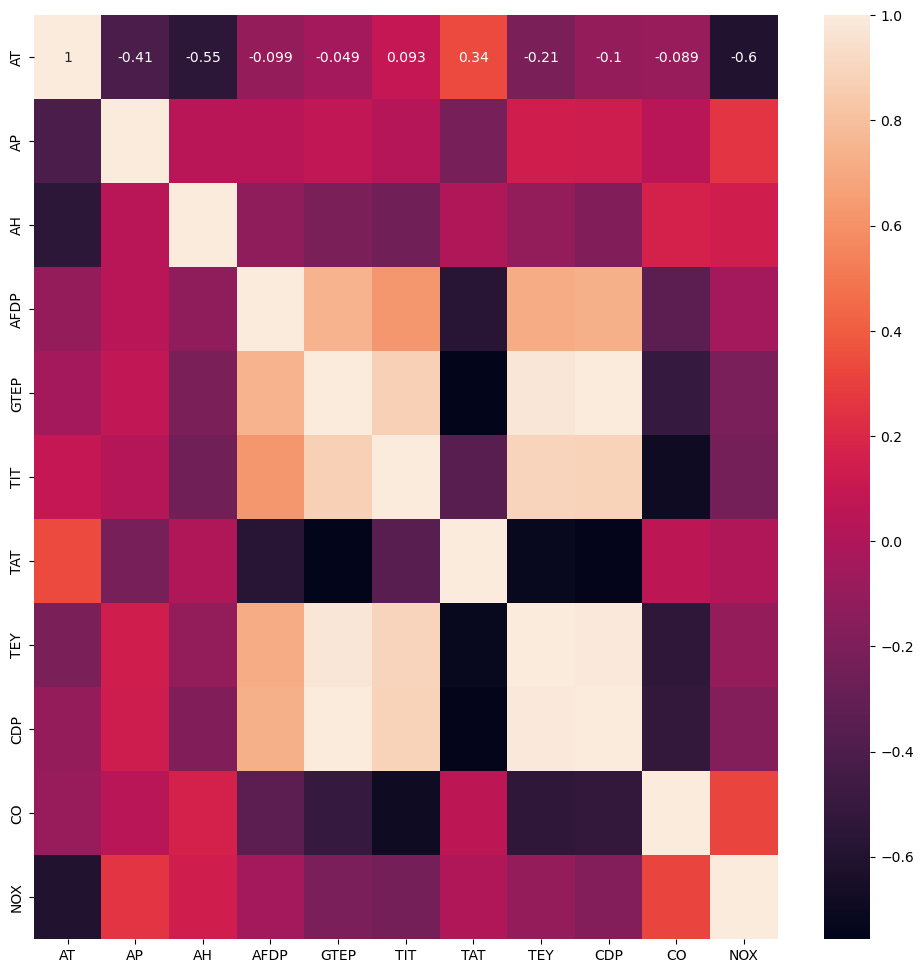

In [50]:
# Heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(data=turbine.corr(), annot=True)
plt.show()

In [51]:
# Correlation of output variable with other variables
turbine.corrwith(turbine['TEY'])

AT     -0.207495
AP      0.146939
AH     -0.110272
AFDP    0.717995
GTEP    0.977042
TIT     0.891587
TAT    -0.720356
TEY     1.000000
CDP     0.988473
CO     -0.541751
NOX    -0.102631
dtype: float64

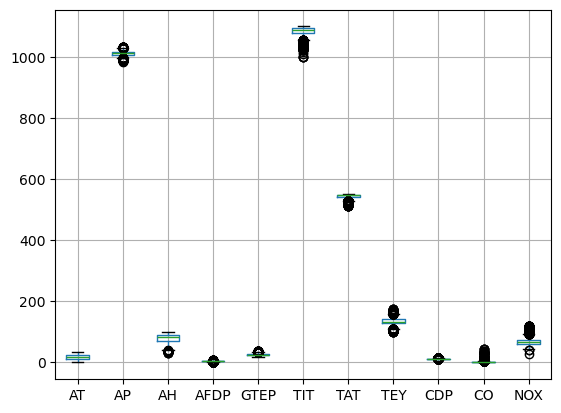

In [52]:
#7. Presence of outliers
turbine.boxplot()
plt.show()

Observation:
1. Dataset has 15,039 records and 11 columns.
2. Data types are consistent.
3. No null values and duplicates observed.
4. From boxplot, outliers can be observed. Therefore, needs to be standardized before processing.
5. Target variable TEY, highly correlated to AFDP, GTEP, TIT, TAT, and CDP.

In [53]:
# Selection of features
variables = turbine.drop('TEY', axis=1)
variables.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0  6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1  6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2  6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3  7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4  7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   

      NOX  
0  82.722  
1  82.776  
2  82.468  
3  82.670  
4  82.311

In [54]:
# Selection of target
outcome = turbine['TEY']
outcome.head()

0    114.70
1    114.72
2    114.71
3    114.72
4    114.72
Name: TEY, dtype: float64

In [55]:
# Scaling of dataset
variables = scaler.fit_transform(variables)

scaler1 = StandardScaler()
outcome = scaler.fit_transform(pd.DataFrame(outcome))

In [56]:
# Splitting of dataset
X_train, X_test, Y_train, Y_test = train_test_split(variables, outcome, test_size=0.3, random_state=10)

#### ANN - Artificial Neural Network

In [57]:
# Initializing ANN
Tann = tf.keras.models.Sequential()

#Adding First Hidden Layer
Tann.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Adding dropout 
Tann.add(Dropout(rate=0.1))

#Adding Second Hidden Layer
Tann.add(tf.keras.layers.Dense(units=5, activation="relu"))

# Adding dropout 
Tann.add(Dropout(rate=0.1))

#Adding Output Layer
Tann.add(tf.keras.layers.Dense(units=1, activation="linear"))

#Compiling ANN
Tann.compile(optimizer="adam",loss="binary_crossentropy", 
             metrics=['mean_absolute_error', 'mean_squared_error'])

#Fitting ANN
Tann.fit(X_train, Y_train, epochs=30, batch_size=50, verbose=0)

In [58]:
Tann.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 5)                 55        
                                                                 
 dropout_54 (Dropout)        (None, 5)                 0         
                                                                 
 dense_82 (Dense)            (None, 5)                 30        
                                                                 
 dropout_55 (Dropout)        (None, 5)                 0         
                                                                 
 dense_83 (Dense)            (None, 1)                 6         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [59]:
predicts = Tann.predict(X_test)
predicts

141/141 [==============================] - 0s 2ms/step


array([[-2.111741  ],
       [-0.19277558],
       [-0.6578882 ],
       ...,
       [-3.167508  ],
       [-0.345177  ],
       [-0.7764977 ]], dtype=float32)

In [60]:
man_score = r2_score(Y_test, predicts)
man_score

0.6478627341975565

#### Hyperparameter tuning for Batch size and epochs

In [61]:
batch_size = [50, 100, 200]
epochs = [20, 30, 50]

score = 0
ep = 0
batch = 0
for size in batch_size:
    for epoch in epochs:
        Tann.fit(X_train, Y_train, epochs=epoch, batch_size=size, verbose=0)
        preds = Tann.predict(X_test)
        r_score = r2_score(Y_test, preds)
        if r_score > score:
            score = r_score
            ep = epoch
            batch = size

141/141 [==============================] - 0s 2ms/step


In [62]:
print(f'Best Batch size: {batch} and epochs: {ep} with accuracy score: {score}')

Best Batch size: 0 and epochs: 0 with accuracy score: 0


#### Hyperparameter tuning for learning rate and dropout rate

In [63]:
learning_rate = [0.01, 0.001, 0.0001]
dropout_rate = [0.1, 0.2, 0.5]
learn_rate = 0
drop_rate = 0
score_rate = 0

for lr in learning_rate:
    for dr in dropout_rate:
        Tann = tf.keras.models.Sequential()
        Tann.add(tf.keras.layers.Dense(units=5, activation="relu"))
        Tann.add(Dropout(rate=dr))
        Tann.add(tf.keras.layers.Dense(units=5, activation="relu"))
        Tann.add(Dropout(rate=dr))
        Tann.add(tf.keras.layers.Dense(units=1, activation="linear"))
        adam=Adam(learning_rate=lr)
        Tann.compile(optimizer=adam, loss="binary_crossentropy", 
                     metrics=['mean_absolute_error', 'mean_squared_error'])
        Tann.fit(X_train, Y_train, epochs=ep, batch_size=batch, verbose=0)
        preds = Tann.predict(X_test)
        acc_score = r2_score(Y_test, preds)
        if acc_score > score_rate:
            score_rate = acc_score
            learn_rate = lr
            drop_rate = dr

141/141 [==============================] - 0s 1ms/step


In [64]:
print(f'Best learning rate: {learn_rate} and dropout rate: {drop_rate} with accuracy score: {score_rate}')

Best learning rate: 0.0001 and dropout rate: 0.1 with accuracy score: 0.1859251953324138


#### Hyperparameter tuning for activation function and kernerl initializer

In [65]:
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

active_fn = ''
kernel_init = ''
score_rate = 0

for fn in activation_function:
    for ker in init:
        Tann = tf.keras.models.Sequential()
        Tann.add(tf.keras.layers.Dense(units=5, activation=fn, kernel_initializer=ker))
        Tann.add(Dropout(rate=drop_rate))
        Tann.add(tf.keras.layers.Dense(units=5, activation=fn, kernel_initializer=ker))
        Tann.add(Dropout(rate=drop_rate))
        Tann.add(tf.keras.layers.Dense(units=1, activation="linear"))
        adam = Adam(learning_rate=learn_rate)
        Tann.compile(optimizer=adam,loss="binary_crossentropy", 
                     metrics=['mean_absolute_error', 'mean_squared_error'])
        Tann.fit(X_train, Y_train, epochs=ep, batch_size=batch, verbose=0)
        preds = Tann.predict(X_test)
        acc_score = r2_score(Y_test, preds)
        if acc_score > score_rate:
            score_rate = acc_score
            active_fn = fn
            kernel_init = ker

141/141 [==============================] - 1s 2ms/step


In [66]:
print(f'Best activation function: {active_fn} and kernel initializer: {kernel_init} with accuracy score: {score_rate}')

Best activation function: tanh and kernel initializer: normal with accuracy score: 0.04996842129994883


#### Optimized model with best parameters

In [67]:
Tann = tf.keras.models.Sequential()
Tann.add(tf.keras.layers.Dense(units=5, activation=f'{active_fn}', kernel_initializer=f'{kernel_init}'))
Tann.add(Dropout(rate=drop_rate))
Tann.add(tf.keras.layers.Dense(units=5, activation=f'{active_fn}', 
                               kernel_initializer=f'{kernel_init}'))
Tann.add(Dropout(rate=drop_rate))
Tann.add(tf.keras.layers.Dense(units=1, activation="linear"))
adam = Adam(learning_rate=learn_rate)
Tann.compile(optimizer=adam,loss="binary_crossentropy", 
             metrics=['mean_absolute_error', 'mean_squared_error'])
Tann.fit(X_train, Y_train, epochs=ep, batch_size=batch)
preds = Tann.predict(X_test)
opt_score = r2_score(Y_test, preds)

141/141 [==============================] - 1s 2ms/step


In [68]:
# Result
if opt_score > man_score:
    print('Accuracy of optimized model: ', opt_score)
    print('Best parameters of optimized model:')
    print(f'activation function: {active_fn} and kernel initializer: {kernel_init}')
    print(f'Best learning rate: {learn_rate} and dropout rate: {drop_rate}')
    print(f'Best Batch size: {batch} and epochs: {ep}')
else:
    print('Accuracy of manual model: ', man_score)
    print('Parameters of manual model:')
    print('activation function: relu and kernel initializer: glorot_uniform')
    print('Best learning rate: 0.001 and dropout rate: 0.1')
    print('Best Batch size: 50 and epochs: 30')

Accuracy of manual model:  0.6478627341975565
Parameters of manual model:
activation function: relu and kernel initializer: glorot_uniform
Best learning rate: 0.001 and dropout rate: 0.1
Best Batch size: 50 and epochs: 30
